# This is a sample Jupyter Notebook

Below is an example of a code cell.
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import  pandas as pd
import numpy as np

import matplotlib.pyplot as plt
!pip install seaborn --upgrade
import seaborn as sns
plt.style.use('default')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('./models/final_dataset.csv')

In [3]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [5]:
print(df.isnull().sum())
print()
print(df.duplicated().sum())

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

0


In [6]:
df. describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


/var/folders/c8/vgvts56j68z_k45tq39x8pwc0000gn/T/ipykernel_30513/1909530044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_aqi.index, y=monthly_aqi.values, palette='viridis')


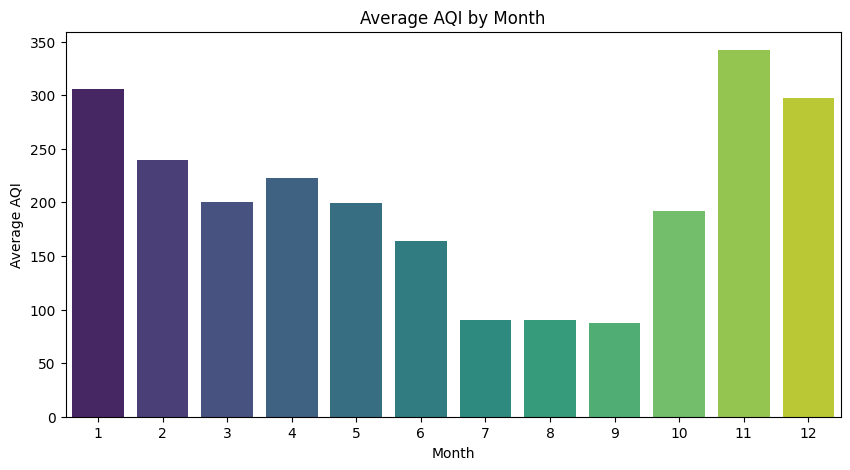

In [15]:

monthly_aqi = df.groupby('Month')['AQI'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_aqi.index, y=monthly_aqi.values, palette='viridis')
plt.title("Average AQI by Month")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.show()


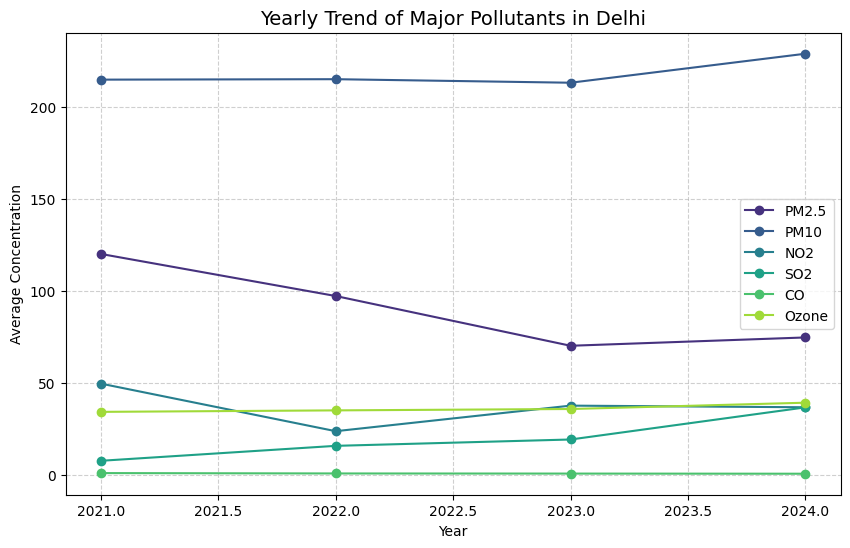

In [8]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
yearly_pollutants = df.groupby('Year')[pollutants].mean().reset_index()

plt.figure(figsize=(10, 6))
for col in pollutants:
    plt.plot(yearly_pollutants['Year'], yearly_pollutants[col], marker='o', label=col)

plt.title("Yearly Trend of Major Pollutants in Delhi", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Concentration")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


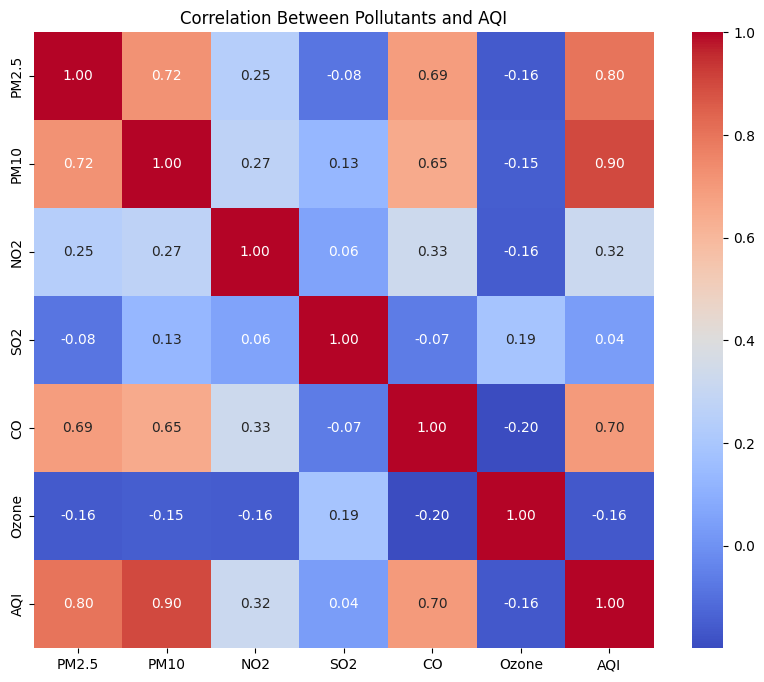

In [9]:
plt.figure(figsize=(10, 8))
correlation = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Pollutants and AQI')
plt.show()

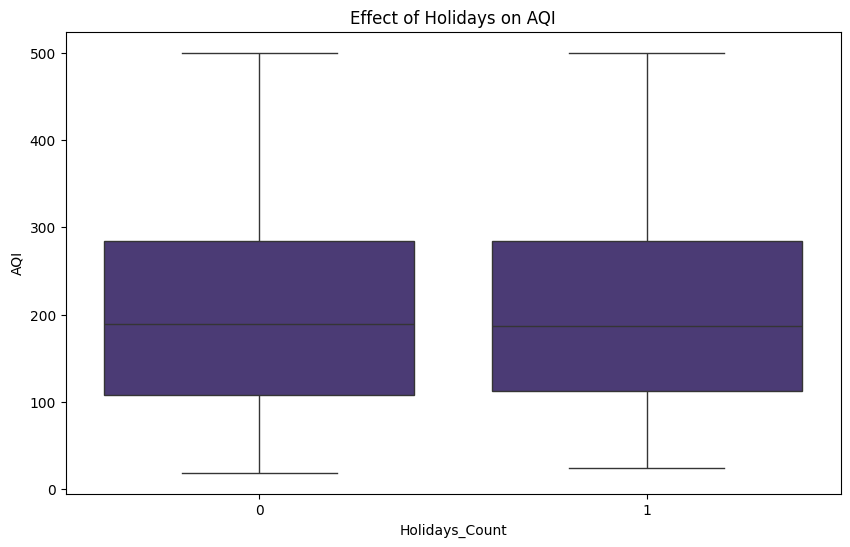

In [10]:
sns.boxplot(x='Holidays_Count', y='AQI', data=df)
plt.title("Effect of Holidays on AQI")
plt.show()


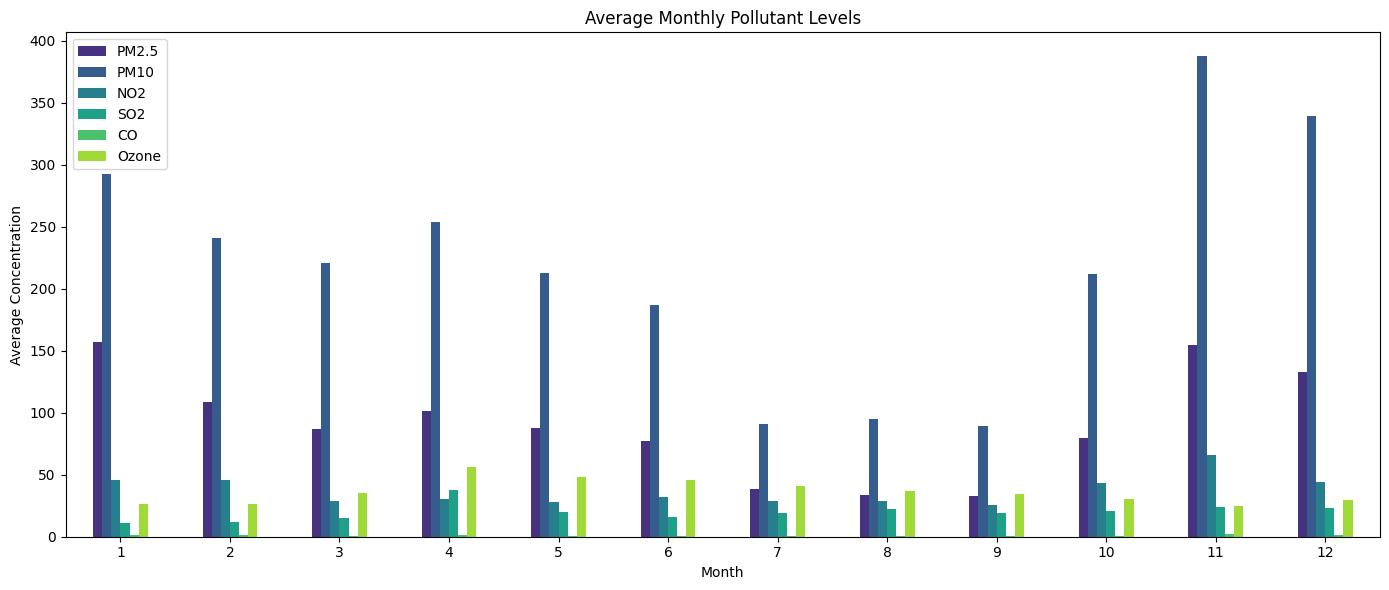

In [11]:
monthly_avg = df.groupby('Month')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']].mean()
monthly_avg.plot(kind='bar', figsize=(14, 6))
plt.title('Average Monthly Pollutant Levels')
plt.ylabel('Average Concentration')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

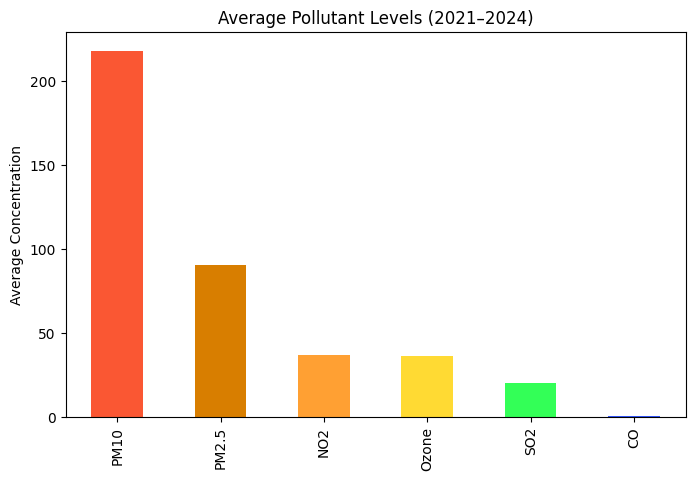

In [39]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
avg_pollutants = df[pollutants].mean().sort_values(ascending=False)

avg_pollutants.plot(kind='bar', color=['#FA5733', "#D87E00", "#FFA033", "#FFDA33", "#33FF57", "#3357FF"], figsize=(8,5), title='Average Pollutant Levels (2021–2024)')
plt.ylabel('Average Concentration')
plt.show()

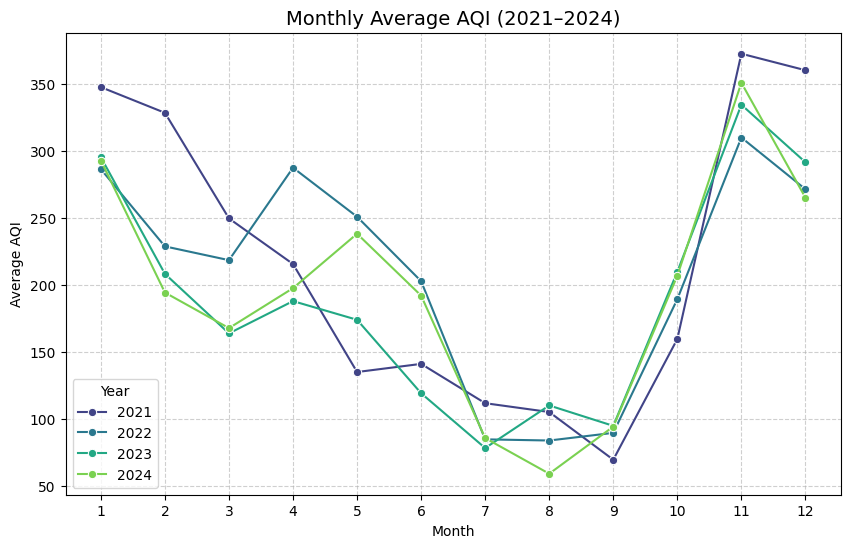

In [22]:
monthly_aqi = df.groupby(['Year', 'Month'])['AQI'].mean().reset_index()

sns.lineplot(
    data=monthly_aqi,
    x='Month',
    y='AQI',
    hue='Year',
    marker='o',
    palette=sns.color_palette('viridis', n_colors=4)
)

plt.title("Monthly Average AQI (2021–2024)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.xticks(range(1, 13))  # ensure months are 1–12
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year')
plt.show()

In [35]:
yearly_avg = df.groupby('Year')['AQI'].mean()
yearly_avg

Year
2021    215.813699
2022    208.536986
2023    189.060274
2024    195.450820
Name: AQI, dtype: float64

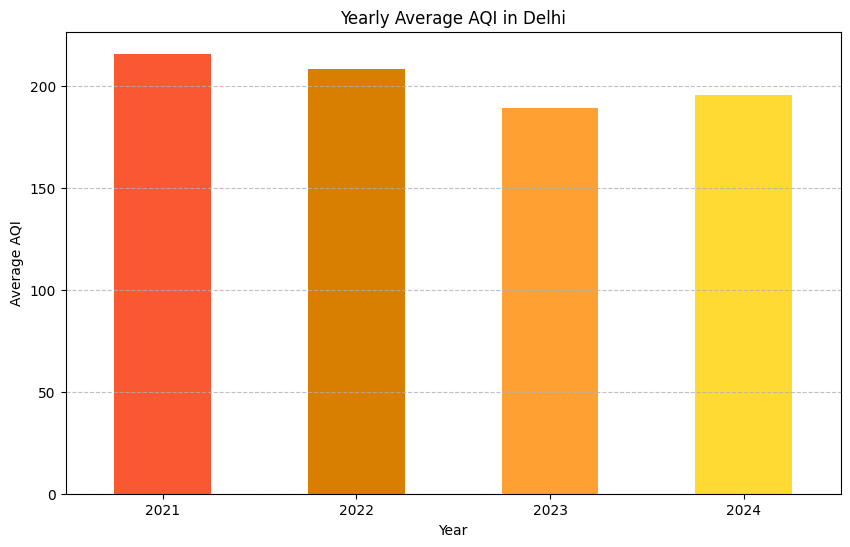

In [36]:
yearly_avg = df.groupby('Year')['AQI'].mean()

yearly_avg.plot(
    kind='bar',
    figsize=(10, 6),
    color=['#FA5733', "#D87E00", "#FFA033", "#FFDA33"],
    title='Yearly Average AQI in Delhi'
)

plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=0)
plt.show()